In [ ]:
import sklearn

sklearn.__version__

'1.0.2'

In [ ]:
# load data
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.7+ KB


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_col = ['Sex']

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

In [ ]:
# ekstrak fitur menggunakan pipeline

X_train = data_pipeline.fit_transform(X_train)
X_test = data_pipeline.transform(X_test)

In [ ]:
import pickle

pickle.dump(data_pipeline, open("preprocess_titanic.pkl", "wb"))

In [ ]:
X_test[:5].tolist()

[[0.8189215120865428,
  -0.6474455632439493,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.31618159662655665,
  0.0,
  1.0],
 [0.8189215120865428,
  -0.09575826022624177,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.49444193154746235,
  1.0,
  0.0],
 [0.8189215120865428,
  0.6923664583704833,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.47464446023756657,
  0.0,
  1.0],
 [0.8189215120865428,
  -0.09575826022624177,
  0.43240061596496426,
  0.8058179583800742,
  -0.3343811230933163,
  0.0,
  1.0],
 [0.8189215120865428,
  0.5347415146511383,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.6592070896198015,
  0.0,
  1.0]]

In [ ]:
X_train.shape

(712, 7)

In [ ]:
X_train[:5]

array([[ 0.81892151, -0.09575826, -0.46517734, -0.47485701, -0.50473909,
         0.        ,  1.        ],
       [ 0.81892151, -0.64744556, -0.46517734, -0.47485701, -0.49621672,
         1.        ,  0.        ],
       [-1.58549959,  0.69236646, -0.46517734, -0.47485701, -0.65920709,
         0.        ,  1.        ],
       [-1.58549959,  1.28346   , -0.46517734, -0.47485701, -0.05198805,
         0.        ,  1.        ],
       [ 0.81892151, -0.09575826, -0.46517734, -0.47485701, -0.49355347,
         0.        ,  1.        ]])

In [ ]:
# BUILD MODEL
# sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Fully connected layer

# deklarasi model
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(7,))) # hidden layer 4 neuron
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy',     # jika case multi-class, gunakan softmax untuk activation. dan categorical_crossentropy untuk loss.
              optimizer="adam",
              metrics=['accuracy'])

# train
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
23/23 [==============================] - 1s 10ms/step - loss: 0.8075 - accuracy: 0.3680 - val_loss: 0.7797 - val_accuracy: 0.4078
Epoch 2/300
23/23 [==============================] - 0s 4ms/step - loss: 0.7811 - accuracy: 0.3708 - val_loss: 0.7583 - val_accuracy: 0.3966
Epoch 3/300
23/23 [==============================] - 0s 4ms/step - loss: 0.7589 - accuracy: 0.4003 - val_loss: 0.7400 - val_accuracy: 0.4413
Epoch 4/300
23/23 [==============================] - 0s 4ms/step - loss: 0.7407 - accuracy: 0.4031 - val_loss: 0.7247 - val_accuracy: 0.4469
Epoch 5/300
23/23 [==============================] - 0s 4ms/step - loss: 0.7249 - accuracy: 0.4551 - val_loss: 0.7117 - val_accuracy: 0.4469
Epoch 6/300
23/23 [==============================] - 0s 4ms/step - loss: 0.7108 - accuracy: 0.4986 - val_loss: 0.7001 - val_accuracy: 0.4581
Epoch 7/300
23/23 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.5323 - val_loss: 0.6903 - val_accuracy: 0.5140
Epoch 8/300


In [ ]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.807459,0.367978,0.779708,0.407821
1,0.781131,0.370787,0.758345,0.396648
2,0.758873,0.400281,0.739972,0.441341
3,0.740661,0.403090,0.724738,0.446927
4,0.724897,0.455056,0.711709,0.446927


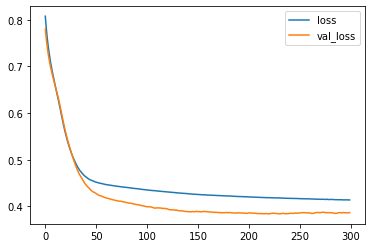

In [ ]:
import matplotlib.pyplot as plt
metrics[['loss', 'val_loss']].plot()

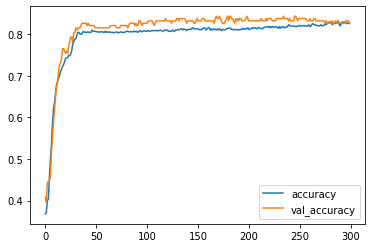

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# freeze model
model.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 0
Non-trainable params: 37
_________________________________________________________________


In [ ]:
model.save("titanic_model")

In [ ]:
! zip -r titanic_model.zip titanic_model

updating: titanic_model/ (stored 0%)
updating: titanic_model/variables/ (stored 0%)
updating: titanic_model/variables/variables.data-00000-of-00001 (deflated 67%)
updating: titanic_model/variables/variables.index (deflated 60%)
updating: titanic_model/keras_metadata.pb (deflated 84%)
updating: titanic_model/saved_model.pb (deflated 86%)
updating: titanic_model/assets/ (stored 0%)


In [ ]:
model.save("titanic_model.h5")

# Setelah Deploy Model ke Heroku

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [ ]:
new_data = {'Pclass': 1,
         'Sex': 'male',
         'Age' : 21,
         'SibSp' :1,
         'Parch' : 2,
         'Fare' : 50}
new_data = pd.DataFrame([new_data])
new_data

,Pclass,Sex,Age,SibSp,Parch,fare
0,1,male,21,1,2,50


In [ ]:
new_data = X_train[:5].tolist()
new_data

[[0.8189215120865428,
  -0.09575826022624177,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.5047390881166323,
  0.0,
  1.0],
 [0.8189215120865428,
  -0.6474455632439493,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.4962167156199056,
  1.0,
  0.0],
 [-1.58549958731807,
  0.6923664583704833,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.6592070896198015,
  0.0,
  1.0],
 [-1.58549958731807,
  1.283459997318027,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.05198804922803272,
  0.0,
  1.0],
 [0.8189215120865428,
  -0.09575826022624177,
  -0.46517733904102565,
  -0.47485701118825807,
  -0.49355347421467854,
  0.0,
  1.0]]

In [ ]:
result = model.predict(new_data)
result

array([[0.1225469 ],
       [0.64602566],
       [0.29614428],
       [0.24803467],
       [0.12412245]], dtype=float32)

In [ ]:
for i in result:
  if i[0] > 0.5:
    print('Survived')
  else:
    print('Not Survived')

Not Survived
Survived
Not Survived
Not Survived
Not Survived


In [ ]:
new_data = [[1, 1, 1, 0, 1, 2]]

In [ ]:
# inference
# input data
import json

input_data_json = json.dumps({
    "signature_name": "serving_default",
    "instances": new_data
})

In [ ]:
# predict
import requests

URL = "http://tfserving-back14.herokuapp.com/v1/models/titanic_model:predict"
r = requests.post(URL, data=input_data_json)
res = r.json()
res

{'predictions': [[0.122546911],
  [0.646025658],
  [0.296144307],
  [0.248034686],
  [0.124122411]]}

In [ ]:
if r.status_code == 200:
  res = r.json()
  for i in res['predictions']:
    if i[0] > 0.5:
      print('Survived')
    else:
      print('Not Survived')
else:
  print('Error')

Not Survived
Survived
Not Survived
Not Survived
Not Survived


In [ ]:
result = model.predict(new_data)
result

array([[0.1225469 ],
       [0.64602566],
       [0.29614428],
       [0.24803467],
       [0.12412245]], dtype=float32)